Beispiel Hauspreise

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os

# Import Data
data = pd.read_csv("https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/house_pricing_data/house_pricing_train.csv")
data.head()  # Print first few rows to verify

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,6840701095,20150403T000000,3,1.00,1740,4400,1.5,0,0,3,...,1740,0,1924,0,98122,47.6059,-122.300,1720,4400,548500.0
1,1025049114,20140717T000000,3,2.25,1270,1566,2.0,0,0,3,...,1060,210,2014,0,98105,47.6647,-122.284,1160,1327,625504.0
2,4025300360,20150326T000000,3,2.00,1130,16875,1.0,0,0,4,...,1130,0,1947,0,98155,47.7489,-122.300,1600,14300,349500.0
3,5536500200,20140918T000000,5,3.50,3760,4857,2.0,0,3,3,...,2820,940,2004,0,98072,47.7398,-122.167,3000,5693,730000.0
4,1245003660,20150321T000000,3,2.00,1470,6000,1.0,0,0,3,...,1090,380,1950,1996,98033,47.6829,-122.202,1880,7799,630000.0


In [3]:
# Define categorical features
categorical_features = ['bathrooms', 'condition']

# Inspect data types and unique values for categorical columns
print(data[categorical_features].dtypes)
print("Unique Values:\n",data[categorical_features].apply(lambda x: x.unique()))

# Ensure categorical columns are treated as categories
for col in categorical_features:
    data[col] = data[col].astype('category')

# Encode categorical variables using pd.get_dummies
features = pd.get_dummies(data[categorical_features], drop_first=True, dtype=int)

# Include any numeric columns that are not categorical
features['sqft_living15'] = data['sqft_living15']

# Construct the prepared data set including the dependent variable ('label')
prepared_data = pd.concat([data[['price']], features], axis=1)

# Handle missing values by removing rows with any missing values
prepared_data = prepared_data.dropna()

# Display the shape of the prepared data set
print(prepared_data.shape)
# Display the first few rows of the prepared data set
prepared_data.head()

bathrooms    float64
condition      int64
dtype: object
Unique Values:
 bathrooms    [1.0, 2.25, 2.0, 3.5, 2.5, 1.75, 2.75, 1.5, 3....
condition                                      [3, 4, 5, 1, 2]
dtype: object
(17290, 35)


,price,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,...,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,condition_2,condition_3,condition_4,condition_5,sqft_living15
0,548500.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1720
1,625504.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1160
2,349500.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1600
3,730000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3000
4,630000.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1880


In [4]:
# Set a random seed for reproducibility
np.random.seed(42)

# Shuffle the data
prepared_data = prepared_data.sample(frac=1).reset_index(drop=True)

# Calculate the number of rows for each dataset
n_total = len(prepared_data)
n_training = int(0.7 * n_total)
n_validation = int(0.20 * n_total)

# Split the features and labels for training, validation, and test
training_data = prepared_data.iloc[:n_training]
validation_data = prepared_data.iloc[n_training:n_training+n_validation]
test_data = prepared_data.iloc[n_training+n_validation:]

# Separating features and labels
training_features = training_data.drop('price', axis=1)
validation_features = validation_data.drop('price', axis=1)
test_features = test_data.drop('price', axis=1)

training_labels = training_data[['price']]
validation_labels = validation_data[['price']]
test_labels = test_data[['price']]

# Print dimensions of the dataframes
print("Training features dimensions:", training_features.shape)
print("Validation features dimensions:", validation_features.shape)
print("Test features dimensions:", test_features.shape)
print()
print("Training labels dimensions:", training_labels.shape)
print("Validation labels dimensions:", validation_labels.shape)
print("Test labels dimensions:", test_labels.shape)

Training features dimensions: (12103, 34)
Validation features dimensions: (3458, 34)
Test features dimensions: (1729, 34)

Training labels dimensions: (12103, 1)
Validation labels dimensions: (3458, 1)
Test labels dimensions: (1729, 1)


In [5]:
# Create subdirectory for the pickle files
subdirectory = "pickle_data"
os.makedirs(subdirectory, exist_ok=True)

# Export of the prepared data to subdirectory as pickle files
training_features.to_pickle(f"{subdirectory}/training_features.pkl")
validation_features.to_pickle(f"{subdirectory}/validation_features.pkl")
test_features.to_pickle(f"{subdirectory}/test_features.pkl")
training_labels.to_pickle(f"{subdirectory}/training_labels.pkl")
validation_labels.to_pickle(f"{subdirectory}/validation_labels.pkl")
test_labels.to_pickle(f"{subdirectory}/test_labels.pkl")

In [6]:
# Import the necessary libraries
import pandas as pd

# Define the file paths
subdirectory = "pickle_data"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
test_labels = pd.read_pickle(test_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())


Loaded Training features dimensions: (12103, 34)
Loaded Validation features dimensions: (3458, 34)
Loaded Test features dimensions: (1729, 34)

Loaded Training labels dimensions: (12103, 1)
Loaded Validation labels dimensions: (3458, 1)
Loaded Test labels dimensions: (1729, 1)

First few rows of loaded training features:
   bathrooms_0.5  bathrooms_0.75  bathrooms_1.0  bathrooms_1.25  \
0              0               0              1               0   
1              0               0              1               0   
2              0               0              0               0   
3              0               0              0               0   
4              0               0              0               0   

   bathrooms_1.5  bathrooms_1.75  bathrooms_2.0  bathrooms_2.25  \
0              0               0              0               0   
1              0               0              0               0   
2              0               0              0               0   
3     

In [1]:
!rm -rf myenv
!python -m venv myenv
# Run the following command in your terminal:
# source myenv/bin/activate  # On Windows use `myenv\Scripts\activate`
!pip install -y numpy==1.26.0
!pip install -y tensorflow==2.17.1


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y


In [7]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Example data for training_features
# Replace this with your actual data loading code
training_features = pd.DataFrame(np.random.rand(100, 10))  # 100 samples, 10 features

# Define the model
model = Sequential([
    InputLayer(shape=(training_features.shape[1], )),
    BatchNormalization(),
    Dense(10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)
])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199 (796.00 B)

 Trainable params: 179 (716.00 B)

 Non-trainable params: 20 (80.00 B)

In [10]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Example data for training_features and training_labels
# Replace this with your actual data loading code
training_features = pd.DataFrame(np.random.rand(100, 10))  # 100 samples, 10 features
training_labels = pd.Series(np.random.rand(100))  # 100 labels

# Define the model
model = Sequential([
    InputLayer(shape=(training_features.shape[1], )),
    BatchNormalization(),
    Dense(10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Print the model summary
model.summary()

# Train the model
model.fit(training_features, training_labels, epochs=10, batch_size=32)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_2           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199 (796.00 B)

 Trainable params: 179 (716.00 B)

 Non-trainable params: 20 (80.00 B)

Epoch 1/10


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4701
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3905 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4154 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3896 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3542 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3320 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2875 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2698 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2695 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3248


In [12]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Example data for training and validation features and labels
# Replace this with your actual data loading code
training_features = pd.DataFrame(np.random.rand(100, 10))  # 100 samples, 10 features
training_labels = pd.Series(np.random.rand(100))  # 100 labels
validation_features = pd.DataFrame(np.random.rand(20, 10))  # 20 samples, 10 features
validation_labels = pd.Series(np.random.rand(20))  # 20 labels

# Define the model
model = Sequential([
    InputLayer(shape=(training_features.shape[1], )),
    BatchNormalization(),
    Dense(10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Print the model summary
model.summary()

# Train the model with validation data
model.fit(training_features, training_labels, epochs=10, batch_size=32, validation_data=(validation_features, validation_labels))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_3           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199 (796.00 B)

 Trainable params: 179 (716.00 B)

 Non-trainable params: 20 (80.00 B)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.4996 - val_loss: 0.6497
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4386 - val_loss: 0.5796
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4139 - val_loss: 0.5161
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3575 - val_loss: 0.4574
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3559 - val_loss: 0.4049
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3145 - val_loss: 0.3605
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3007 - val_loss: 0.3232
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2857 - val_loss: 0.2925
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2586 - val_loss: 0.2690
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2402 - val_loss: 0.2470


In [13]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/20


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.2269 - val_loss: 0.2291
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2125 - val_loss: 0.2167
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2129 - val_loss: 0.2040
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1856 - val_loss: 0.1901
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1831 - val_loss: 0.1775
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1724 - val_loss: 0.1693
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1744 - val_loss: 0.1622
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1737 - val_loss: 0.1563
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1509 - val_loss: 0.1519
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1591 - val_loss: 0.1481
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1559 - val_loss: 0.1454
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1452 - val_loss: 0.1428
Epoch 13/20


In [14]:
model.save("python_model.h5")

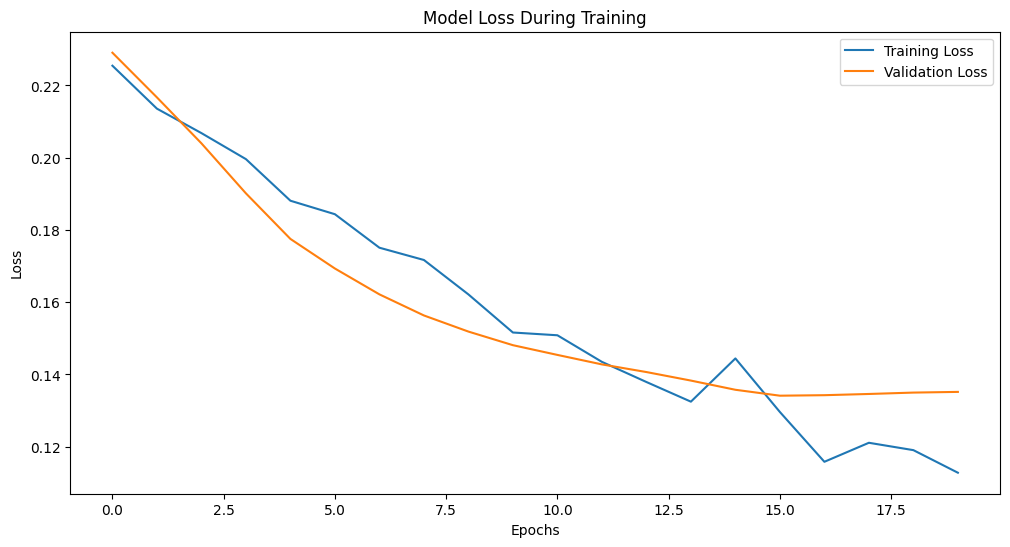

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MAPE on the Training Data: 148.94%
MAPE on the Validation Data: 140.11%


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


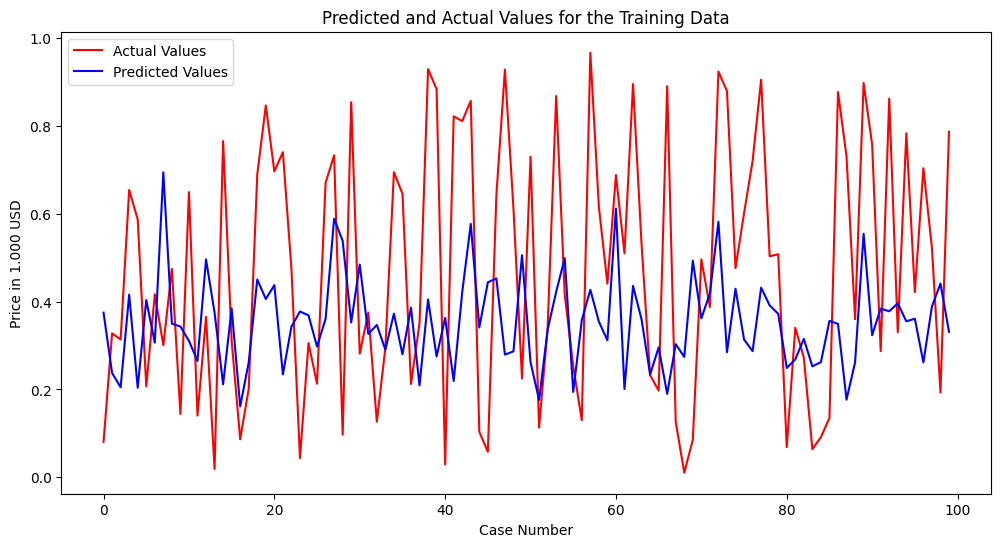

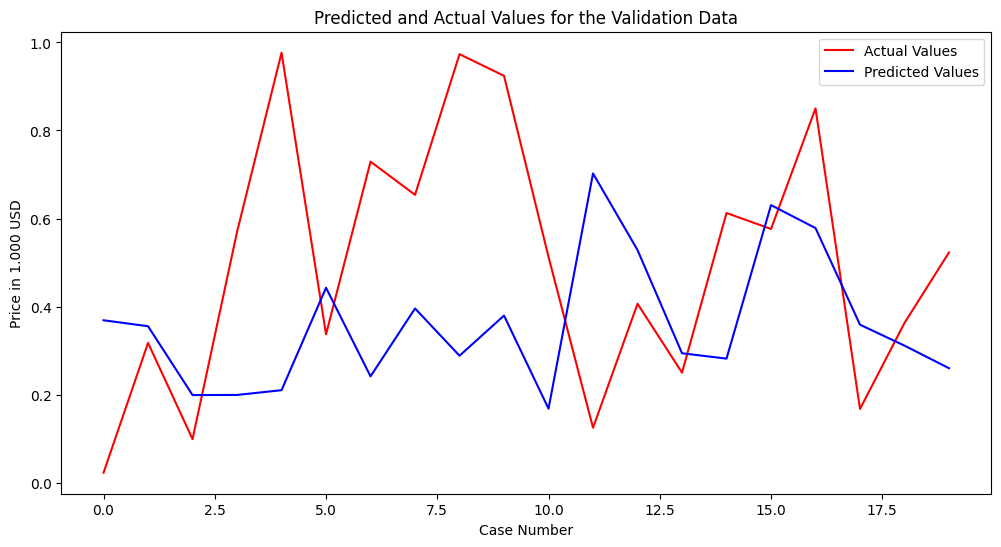

In [17]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Price in 1.000 USD')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')